In [2]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from tensorflow.math import confusion_matrix
import seaborn as sns
from sklearn import metrics

# Experimenting with ML models

In [3]:
# Reading data
data = pd.read_csv('../../raw_data/data_1k.csv')
data.head()

FileNotFoundError: [Errno 2] No such file or directory: '../raw_data/data_1k.csv'

In [80]:
# OneHot Encoding topics
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
topic_targets_enc = pd.DataFrame(enc.fit_transform(data[['topic']]))
topic_targets_enc.columns = enc.get_feature_names_out()

In [81]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(data['modified text'], topic_targets_enc, test_size=0.3)

In [82]:
# Tf-idf Word Vectorization
Tfidf_vect = TfidfVectorizer(max_features=100)
Tfidf_vect.fit(data['modified text'])

Train_X_Tfidf = Tfidf_vect.transform(X_train)
Test_X_Tfidf = Tfidf_vect.transform(X_test)

print(Tfidf_vect.vocabulary_)

{'method': 46, 'use': 95, 'vector': 97, 'cid': 7, 'sequence': 77, 'also': 1, 'et': 22, 'al': 0, 'however': 33, 'limit': 36, 'linear': 38, 'two': 93, 'one': 56, 'result': 72, 'property': 68, 'work': 99, 'correspond': 11, 'process': 66, 'cell': 6, 'well': 98, 'fig': 25, 'give': 30, 'show': 79, 'form': 28, 'may': 43, 'order': 58, 'phase': 62, 'figure': 26, 'line': 37, 'particle': 61, 'de': 13, 'take': 87, 'measure': 45, 'see': 76, 'analysis': 2, 'data': 12, 'di': 15, 'obtain': 55, 'provide': 70, 'note': 53, 'base': 4, 'condition': 8, 'state': 83, 'energy': 19, 'section': 75, 'solution': 81, 'thus': 91, 'number': 54, 'system': 86, 'function': 29, 'present': 64, 'eld': 17, 'problem': 65, 'study': 85, 'non': 52, 'model': 47, 'structure': 84, 'type': 94, 'time': 92, 'follow': 27, 'eq': 20, 'value': 96, 'constant': 10, 'paper': 59, 'parameter': 60, 'ne': 48, 'group': 32, 'ned': 49, 'rst': 74, 'consider': 9, 'term': 88, 'exist': 24, 'distribution': 16, 'point': 63, 'case': 5, 'example': 23, 'th

In [83]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,np.argmax(np.array(y_train), axis=1))

# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, np.argmax(np.array(y_test), axis=1)*100))

Naive Bayes Accuracy Score ->  0.030828516377649325


In [84]:
print(metrics.classification_report(np.argmax(np.array(y_test), axis=1), predictions_NB, target_names=['Positive', 'Negative', 'A', 'B']))

              precision    recall  f1-score   support

    Positive       0.73      0.40      0.52        40
    Negative       0.87      0.86      0.87       264
           A       0.73      0.89      0.80       196
           B       0.00      0.00      0.00        19

    accuracy                           0.80       519
   macro avg       0.58      0.54      0.55       519
weighted avg       0.78      0.80      0.78       519



/home/stefanie/.pyenv/versions/WorkingPaper/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stefanie/.pyenv/versions/WorkingPaper/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stefanie/.pyenv/versions/WorkingPaper/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Confusion matrix:
[[ 16   9  15   0]
 [  0 227  37   0]
 [  1  21 174   0]
 [  5   3  11   0]]
0 topic_biology
1 topic_mathematics
2 topic_physics
3 topic_psychology


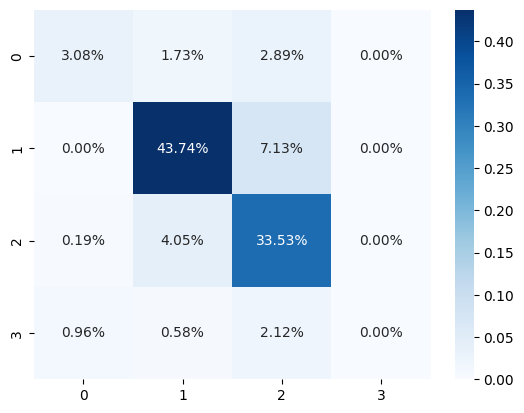

In [85]:
print("Confusion matrix:")
print(metrics.confusion_matrix(np.argmax(np.array(y_test), axis=1), predictions_NB))

conf_matrix = confusion_matrix(labels=np.argmax(np.array(y_test), axis=1), predictions=predictions_NB)
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Blues')
for i, column in enumerate(topic_targets_enc.columns):
    print(i, column)

In [86]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,np.argmax(np.array(y_train), axis=1))
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, np.argmax(np.array(y_test), axis=1))*100)

SVM Accuracy Score ->  83.42967244701349


Confusion matrix:
[[ 23   6   8   3]
 [  0 233  31   0]
 [  4  19 173   0]
 [ 10   1   4   4]]
0 topic_biology
1 topic_mathematics
2 topic_physics
3 topic_psychology


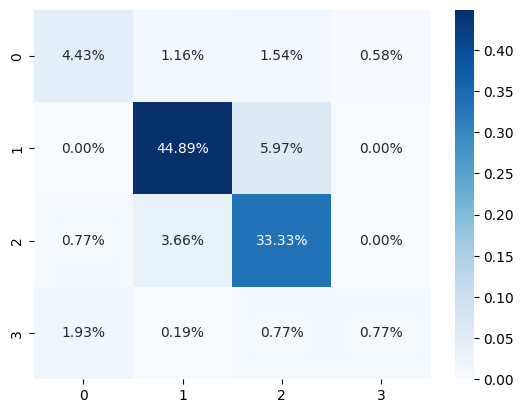

In [87]:
print("Confusion matrix:")
print(metrics.confusion_matrix(np.argmax(np.array(y_test), axis=1), predictions_SVM))

conf_matrix = confusion_matrix(labels=np.argmax(np.array(y_test), axis=1), predictions=predictions_SVM)
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Blues')
for i, column in enumerate(topic_targets_enc.columns):
    print(i, column)

In [88]:
# imbalanced!!!!
data['topic'].value_counts()

mathematics    918
physics        630
biology        129
psychology      52
Name: topic, dtype: int64

## Filtering for least common words

In [89]:
import gensim.downloader as api
from gensim.models import TfidfModel
from gensim.corpora import Dictionary

In [90]:
corpus = [doc for doc in data['modified text']]
dictionary = Dictionary()
#corpus = [dictionary.doc2bow(doc) for doc in data['modified text']]

tfidf = TfidfModel(corpus, id2word=doc)

low_value = 0.2
low_value_words = []
for bow in corpus:
    low_value_words += [id for id, value in tfidf[bow] if value < low_value]

NameError: name 'doc' is not defined